In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.who.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-20,282
2020-01-21,314
2020-01-22,579
2020-01-23,581
2020-01-24,846


In [4]:
data.tail()

,infected
date,
2020-02-18,73332
2020-02-19,75204
2020-02-20,75748
2020-02-21,76769
2020-02-22,77794


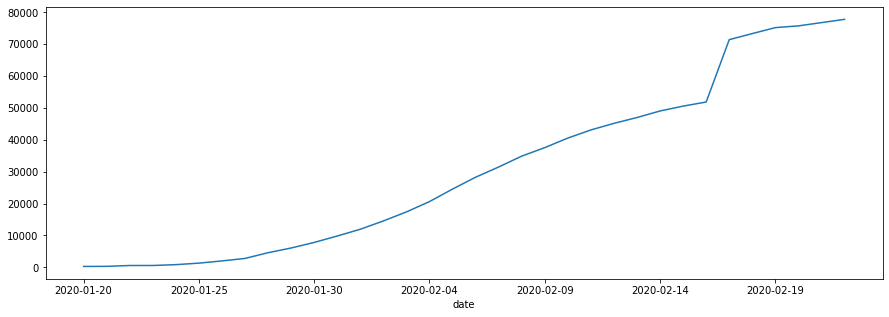

In [5]:
data.infected.plot(figsize=(15, 5))

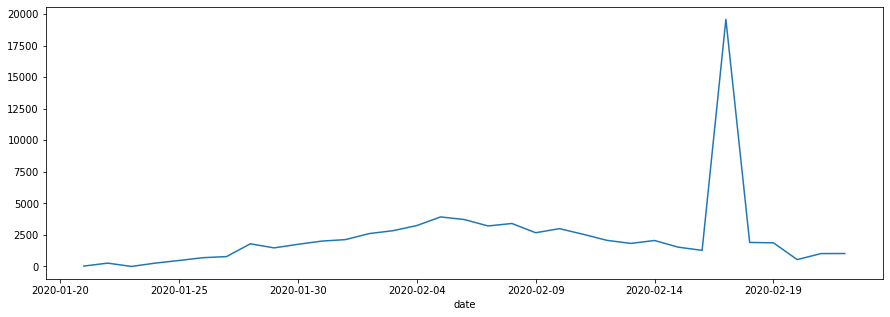

In [6]:
(data.infected - data.infected.shift(1)).plot(figsize=(15, 5))

In [7]:
from pyramid.arima import auto_arima

In [8]:
stepwise_model = auto_arima(data,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=630.901, BIC=633.894, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0); AIC=632.850, BIC=637.339, Fit time=0.264 seconds
Fit ARIMA: order=(0, 1, 1); AIC=632.853, BIC=637.343, Fit time=0.138 seconds
Fit ARIMA: order=(1, 1, 1); AIC=634.837, BIC=640.823, Fit time=1.363 seconds
Total fit time: 2.611 seconds


In [9]:
stepwise_model.aic()

630.9013753969555

In [10]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [11]:
predicted_days = 60
firstPredictionDay = datetime.datetime(2020,2,23)

In [12]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [13]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-02-23 - 80142
2020-02-24 - 82491
2020-02-25 - 84840
2020-02-26 - 87189
2020-02-27 - 89538
2020-02-28 - 91887
2020-02-29 - 94235
2020-03-01 - 96584
2020-03-02 - 98933
2020-03-03 - 101282
2020-03-04 - 103631
2020-03-05 - 105980
2020-03-06 - 108329
2020-03-07 - 110677
2020-03-08 - 113026
2020-03-09 - 115375
2020-03-10 - 117724
2020-03-11 - 120073
2020-03-12 - 122422
2020-03-13 - 124770
2020-03-14 - 127119
2020-03-15 - 129468
2020-03-16 - 131817
2020-03-17 - 134166
2020-03-18 - 136515
2020-03-19 - 138864
2020-03-20 - 141212
2020-03-21 - 143561
2020-03-22 - 145910
2020-03-23 - 148259
2020-03-24 - 150608
2020-03-25 - 152957
2020-03-26 - 155305
2020-03-27 - 157654
2020-03-28 - 160003
2020-03-29 - 162352
2020-03-30 - 164701
2020-03-31 - 167050
2020-04-01 - 169399
2020-04-02 - 171747
2020-04-03 - 174096
2020-04-04 - 176445
2020-04-05 - 178794
2020-04-06 - 181143
2020-04-07 - 183492
2020-04-08 - 185841
2020-04-09 - 188189
2020-04-10 - 190538
2020-04-11 - 192887
2020-04-12 - 195236
2020-04-1